## Loading libraries

In [50]:
import seq_embedding_exp as see

import keras
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt

## Preparing data

In [51]:
SEQ_LEN = 20

In [52]:
sequence_data = see.FakeData(SEQ_LEN)
# arguments for add_data are: range of the starting point, the trend, the noise, and the sequence length
sequence_data.add_data((50,55),1,1,150)  
sequence_data.add_data((50,55),-1,1,20)
sequence_data.add_data((75,80),1,1,80)
sequence_data.add_data((75,80),-1,1,30)

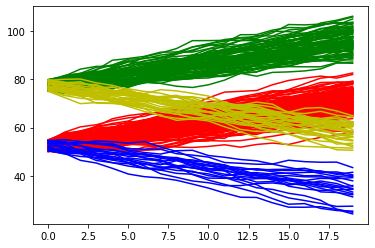

In [53]:
color_list = ['r','b','g','y']
sequence_data.plot(color_list)

In [54]:
training_data = sequence_data.output_data()
print(training_data.shape)
training_data = np.expand_dims(training_data, axis=2)
print(training_data.shape)

(280, 20)
(280, 20, 1)


## Training model

In [56]:
#model = see.get_model(SEQ_LEN,embedding_size=2) # from scratch
model = load_model('./models/best_model_3.hdf5') # from previous one

In [57]:
#model.get_layer('encoder').summary()
#model.get_layer('decoder').summary()

In [58]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [59]:
BATCH_SIZE  = 16
VALID_SPLIT = 0.2
EPOCH       = 20

In [60]:
checkpoint = ModelCheckpoint(
    "best_model.hdf5", 
    monitor='val_loss', verbose=0,
    save_best_only=True, mode='auto', period=1
)

model.fit(training_data, training_data, shuffle=True,
          batch_size = BATCH_SIZE, 
          validation_split = VALID_SPLIT, 
          epochs=EPOCH,callbacks=[checkpoint])

Train on 224 samples, validate on 56 samples
Epoch 1/20
224/224 [==============================] - 8s 37ms/step - loss: 2.2237 - val_loss: 2.0240
Epoch 2/20
224/224 [==============================] - 1s 4ms/step - loss: 1.8139 - val_loss: 2.2586
Epoch 3/20
224/224 [==============================] - 1s 4ms/step - loss: 1.7358 - val_loss: 1.7966
Epoch 4/20
224/224 [==============================] - 1s 4ms/step - loss: 1.7165 - val_loss: 2.1541
Epoch 5/20
224/224 [==============================] - 1s 4ms/step - loss: 1.6988 - val_loss: 1.9198
Epoch 6/20
224/224 [==============================] - 1s 4ms/step - loss: 1.7243 - val_loss: 1.9818
Epoch 7/20
224/224 [==============================] - 1s 4ms/step - loss: 1.6931 - val_loss: 1.8745
Epoch 8/20
224/224 [==============================] - 1s 4ms/step - loss: 1.7358 - val_loss: 2.0063
Epoch 9/20
224/224 [==============================] - 1s 4ms/step - loss: 1.6735 - val_loss: 2.0429
Epoch 10/20
224/224 [==============================] -

## Choose model

In [61]:
#model_in_use = load_model('./models/best_model_3.hdf5') # model from past
model_in_use = load_model('./best_model.hdf5') # model just trained

In [62]:
#model_in_use.get_layer('encoder').summary()
#model_in_use.get_layer('decoder').summary()

## Check embedding

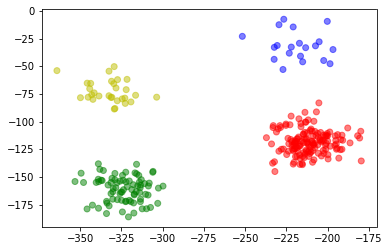

In [63]:
encoder = model_in_use.get_layer('encoder')
embedding = encoder.predict(training_data)

x = embedding[:,0]
y = embedding[:,1]

num_each_batch = [m[-1] for m in sequence_data.meta]
col = [color_list[i] for i,j in enumerate(num_each_batch) for _ in range(j)]
plt.scatter(x, y, c=col, alpha=0.5)
plt.show()

## Check reconstruction

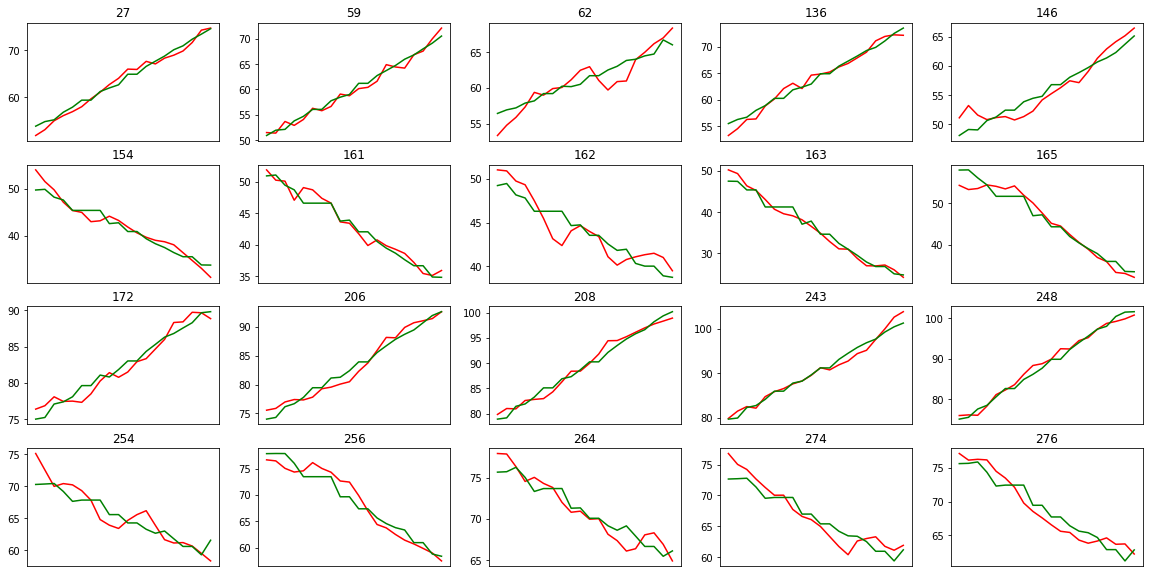

In [76]:
num = 5 # num of sequence to be sampled from each category

seq_picked = sequence_data.sample(num)
batches    = len(sequence_data.meta)
x          = np.array([i for i in range(sequence_data.len)])

plt.figure(figsize=(20,10))

for i,j in enumerate(seq_picked):
    
    true = training_data[j]
    true = np.expand_dims(true, axis=0)
    pred = model_in_use.predict(true)

    true = np.squeeze(true)
    pred = np.squeeze(pred)
    
    plt.subplot(batches, num, i+1)
    plt.title(j)
    plt.xticks([]," ")
    plt.plot(x, true, c='r')
    plt.plot(x, pred, c='g')

plt.show()

## Evaluate

In [65]:
model0 = load_model('./best_model.hdf5')
model1 = load_model('./models/best_model_1.hdf5')
model2 = load_model('./models/best_model_2.hdf5')
model3 = load_model('./models/best_model_3.hdf5')

In [74]:
sequence_data_test = see.FakeData(SEQ_LEN)
sequence_data_test.add_data((50,55),1,1,50)
sequence_data_test.add_data((75,80),-1,1,200)
testing_data = sequence_data_test.output_data()
testing_data = np.expand_dims(testing_data, axis=2)

In [75]:
for m in (model0, model1, model2, model3):
    print(m.evaluate(testing_data,testing_data,verbose=0))

2.101289455413818
3.2626361961364747
2.6804811458587645
2.089462514877319
